# Choosing the best machine learning model
Six different classification algotihms compared on a single dataset

* Logistic Regression
* Linear Discriminant Analysis
* K-Nearest Neighbours (KNN)
* Naive Bayes
* Classification and Regression Trees
* Support Vector Machines

In [1]:
from pandas import read_csv

filename = '04-pima-indians-diabetes.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)

In [2]:
array = dataframe.values

X = array[:,0:8]
Y = array[:,8]

In [3]:
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [4]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [5]:
results = []
names = []

n_splits = 10
random_state = 7
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits = n_splits, random_state = random_state)
    cv_results = cross_val_score(model, X,Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.699163 (0.061674)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


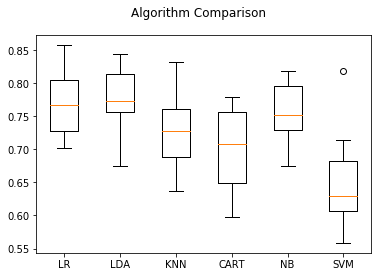

In [6]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

### You may also do a similar comparison like this for Regression Algorithms
The 'Mean Square Error' is the metric to compare in that case.
The closest to zero, the better the accuracy